In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
d1, d2, ds = 34, 40, 1  # Degree range and step
const n, a, b = 2, 1, 4 
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = tref # Objective function

tref (generic function with 1 method)

In [2]:
coeffs_poly_approx = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.1)

dimension Vector space: 630
sample size: 7225
dimension Vector space: 666
sample size: 7921
dimension Vector space: 703
sample size: 8649
dimension Vector space: 741
sample size: 9409
dimension Vector space: 780
sample size: 10201
dimension Vector space: 820
sample size: 11236
dimension Vector space: 861
sample size: 12100


7-element Vector{Vector{Float64}}:
 [1.2793195401310096, -0.6074006800030006, -0.04925413498308907, -0.6056150344506891, -0.07106442302464702, -0.30718835109394954, -0.08522381057445887, 0.20685933633131257, -0.0819476562179323, 0.39727215827475326  …  -0.008745985315082846, 1.2834481599773276e-16, -3.961893543523684e-18, 1.3733186812253968e-17, -1.0336147764632294e-7, 5.0565316911214256e-17, -4.1501868862630564e-17, -0.004872233002092265, -1.6820718374042998e-17, 3.3732442999953326e-9]
 [1.2793195401310116, -0.6074006800029985, -0.04925413498308878, -0.6056150344506904, -0.071064423024648, -0.3071883510939455, -0.08522381057445684, 0.2068593363313072, -0.08194765621793705, 0.3972721582747593  …  -1.0336147818035625e-7, -4.036694593136052e-17, -5.158976788844999e-17, -1.1473264928548086e-16, -0.004871630666983465, 1.4025617963823113e-16, -1.3879707098609417e-16, 3.3732433516873406e-9, 1.0001802595450694e-16, 0.005169605306731331]
 [1.2793195401310105, -0.6074006800029996, -0.0492541349

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, ProgressLogging, DataFrames

include("hom_solve.jl") # Include the homotopy solver and main function
vars = @polyvar(x[1:n]) # Define polynomial ring 
h_x, h_y, col = main_2d(n, d1, d2, ds, coeffs_poly_approx) # main_2d is in hom_solve.jl
df = DataFrame(x=C * h_x, y=C * h_y, col=col)
df[!, :result] = [f([df.x[i], df.y[i]]) for i in 1:nrow(df)];


Computing mixed cells... 2    Time: 0:00:00
Computing mixed cells... 28    Time: 0:00:01
  mixed_volume:  1089


Tracking 1089 paths...   0%|                            |  ETA: 8:39:07



Tracking 1089 paths...   9%|██▍                         |  ETA: 0:10:49



Tracking 1089 paths...  10%|██▊                         |  ETA: 0:09:30



Tracking 1089 paths...  11%|███                         |  ETA: 0:08:22



Tracking 1089 paths...  12%|███▍                        |  ETA: 0:07:32



Tracking 1089 paths...  13%|███▋                        |  ETA: 0:06:53



Tracking 1089 paths...  14%|███▉                        |  ETA: 0:06:17



Tracking 1089 paths...  15%|████▎                       |  ETA: 0:05:49



Tracking 1089 paths...  16%|████▌                       |  ETA: 0:05:24



Tracking 1089 paths...  17%|████▊                       |  ETA: 0:05:04



Tracking 1089 paths...  18%|█████                       |  ETA: 0:04:45



Tracking 1089 paths...  19%|█████▍                      |  ETA: 0:04:26



Tracking 1089 paths...  20%|█████▋                      |  ETA: 0:04:08



Tracking 1089 paths...  2

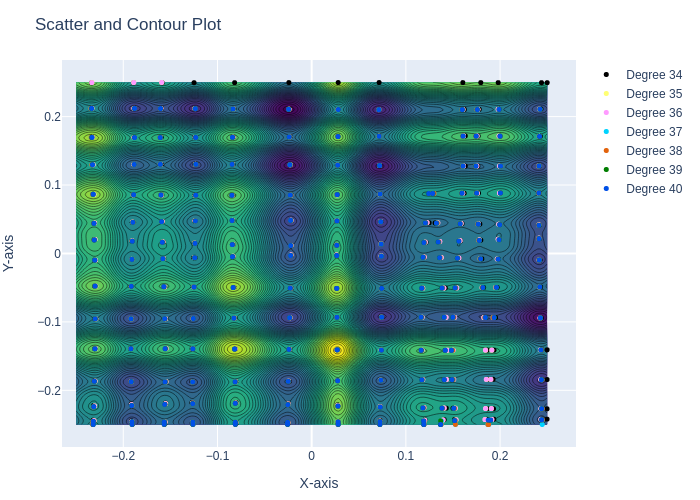

In [4]:
using PlotlyJS, Colors

# Define the function and domain

# Generate the grid and evaluate the function
N = 150  # resolution of the grid
x = range(-C, C, length=N)
y = range(-C, C, length=N)
z = [tref([xi, yi]) for yi in y, xi in x]

# sc_plt = scatter(x=C* h_x, y=C* h_y, mode="markers", marker_color=col, marker_size=5);
# Generate a color palette based on the number of unique `col` values
unique_cols = unique(df.col)
num_colors = length(unique_cols)
color_palette = distinguishable_colors(num_colors)

# Map the `col` values to the corresponding colors
col_to_color = Dict(unique_cols .=> color_palette)

# Create individual scatter traces for each unique `col` value
scatter_traces = [scatter(x=df[df.col .== c, :x], y=df[df.col .== c, :y], mode="markers", marker=attr(color=col_to_color[c], size=5), name="Degree $c") for c in unique_cols]

# Create the contour plot
cp = contour(x=x, y=y, z=z, ncontours=80, colorscale="Viridis", showscale=false)

# Combine contour plot and scatter traces
all_traces = [cp; scatter_traces...]

# Customize layout to handle legend groups
layout = Layout(
    title="Scatter and Contour Plot",
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    legend=(tracegroupgap=10, groupclick="toggleitem")
)

# Display the combined plot with legend
display(plot(all_traces, layout))



Doesn't make too much sense, but maybe we could plot the level sets of the polynomial approximants